# Data Mining and Machine Learning Assignment

## Linear Regression Testing

## A00304954

### My goal in this notebook is to analyze the features from an insurance data set to view their relationships with charges and then to use the analyzed data to try make a predictive model.

In [149]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from itertools import chain, combinations

In [126]:
# Ensure that there is no missing data
df = pd.read_csv("data/insurance.csv")
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### No missing Data ( All have 1338 ) 

In [127]:
# Check Corrolation between all data columns.
df['smoker']=df['smoker'].astype('category').cat.codes
df['sex']=df['sex'].astype('category').cat.codes
df['region']=df['region'].astype('category').cat.codes
df.corr().round(2)

,age,sex,bmi,children,smoker,region,charges
age,1.00,-0.02,0.11,0.04,-0.03,0.00,0.30
sex,-0.02,1.00,0.05,0.02,0.08,0.00,0.06
bmi,0.11,0.05,1.00,0.01,0.00,0.16,0.20
children,0.04,0.02,0.01,1.00,0.01,0.02,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,-0.00,0.79
region,0.00,0.00,0.16,0.02,-0.00,1.00,-0.01
charges,0.30,0.06,0.20,0.07,0.79,-0.01,1.00


### It seems smoker and charges have a quite strong corrolation with 0.787251. This means that the charges are impacted by being a smoker.

<AxesSubplot:ylabel='Frequency'>

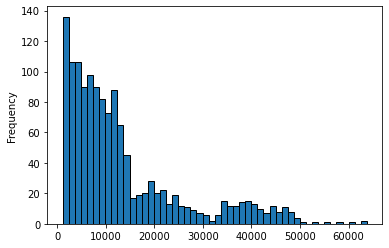

In [128]:
# A histogram of the data.
df.charges.plot.hist(bins=50,ec='black')

<AxesSubplot:title={'center':'charges'}, xlabel='[age]'>

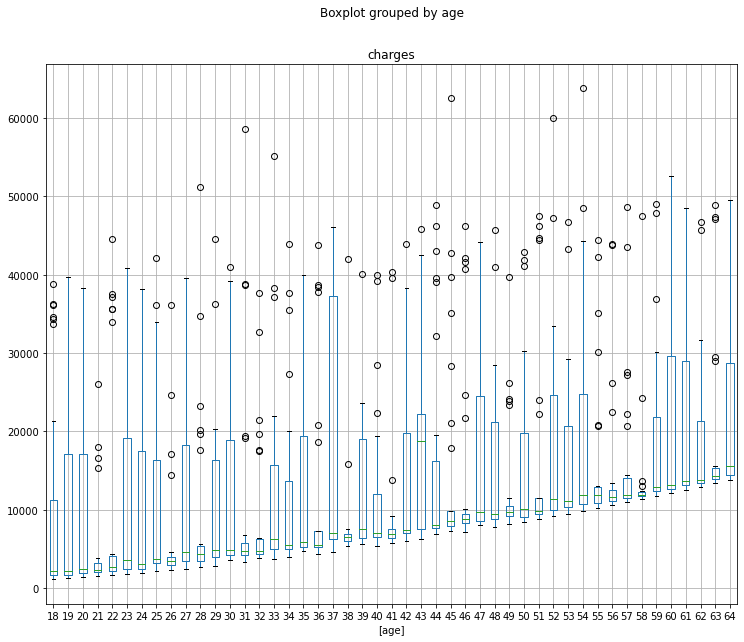

In [129]:
# Check to see if age has an impact on charges
df[['age','charges']].boxplot(by='age',figsize=(12,10))

### Age has an impact on charges as can been seen above. The average cost gradually increases as people get older. However, being young does not prevent you from becoming ill therefore there are some outliers

<AxesSubplot:xlabel='bmi', ylabel='charges'>

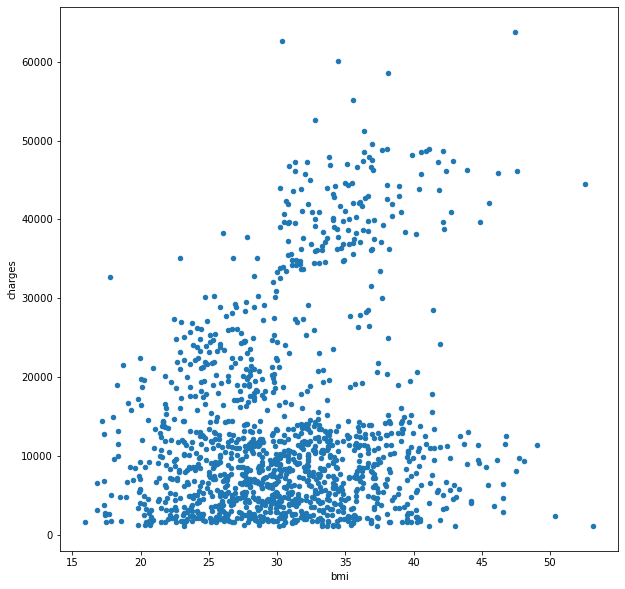

In [130]:
# Check to see if BMI has an impact on charges
df[['bmi','charges']].plot.scatter('bmi','charges',figsize=(10,10))

### BMI has some impact on charges, this can be seen as the BMI rises, there tends to be higher charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

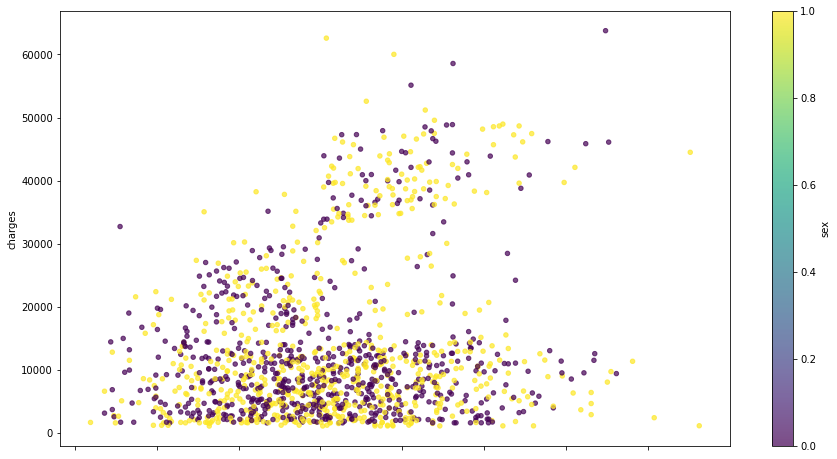

In [131]:
# Does a persons sex and BMI have an impact on their charges
df[['bmi','charges','sex']].plot.scatter('bmi','charges',c='sex',cmap='viridis',alpha=0.7,figsize=(15,8))

### Sex 1 more suseptible to becoming ill than sex 0 when BMI is higher, this can be seen as there are more yellow dots higher up on the plot above

### Sex 1 seems to have higher probability of having higher charges when combined with a higher BMI

<AxesSubplot:xlabel='bmi', ylabel='charges'>

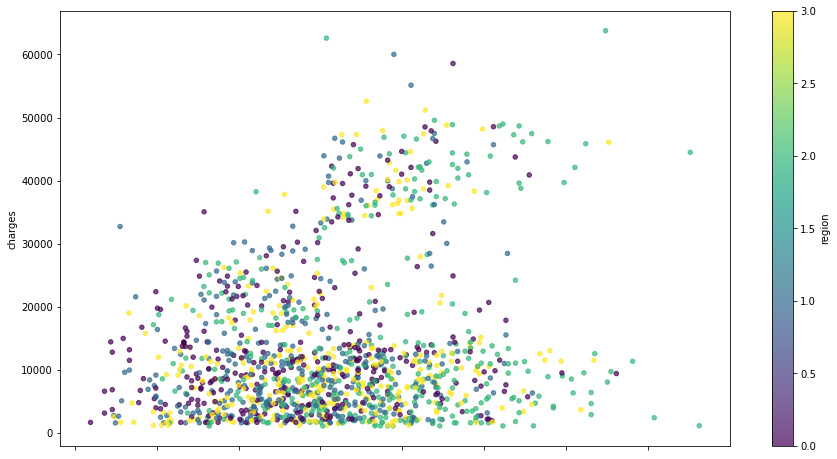

In [132]:
# Does a region and BMI have an impact on charges
df[['bmi','charges','region']].plot.scatter('bmi','charges',c='region',cmap='viridis',alpha=0.7,figsize=(15,8))

### There seems to be little effect of regions on charges when considering BMI

Text(0, 0.5, 'Charges')

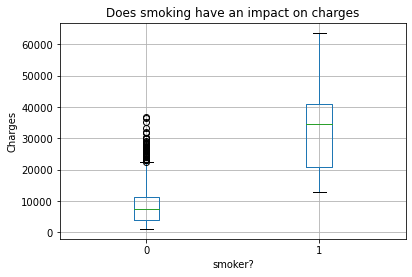

In [133]:
#Does smoking have an impact on expenses
df[['smoker','charges']].boxplot(by='smoker')
plt.suptitle("")
plt.title("Does smoking have an impact on charges")
plt.xlabel('smoker?')
plt.ylabel('Charges')

### The distribution of charges is clearly skewed higher for smokers

<AxesSubplot:title={'center':'charges'}, xlabel='[sex, children]'>

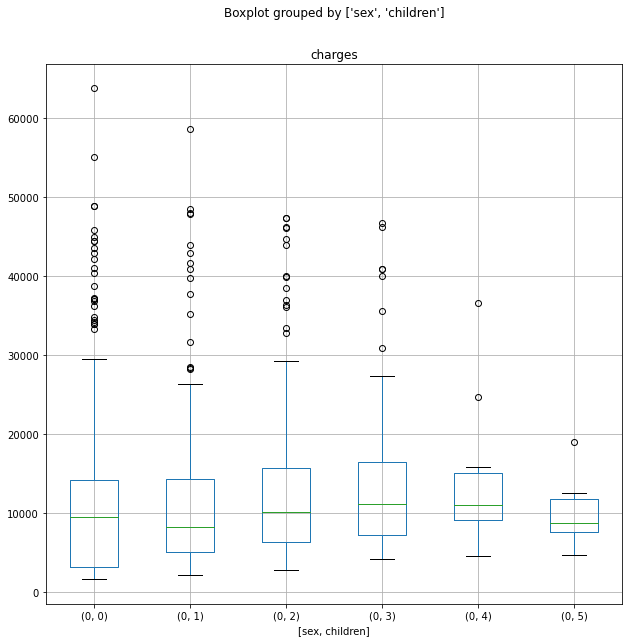

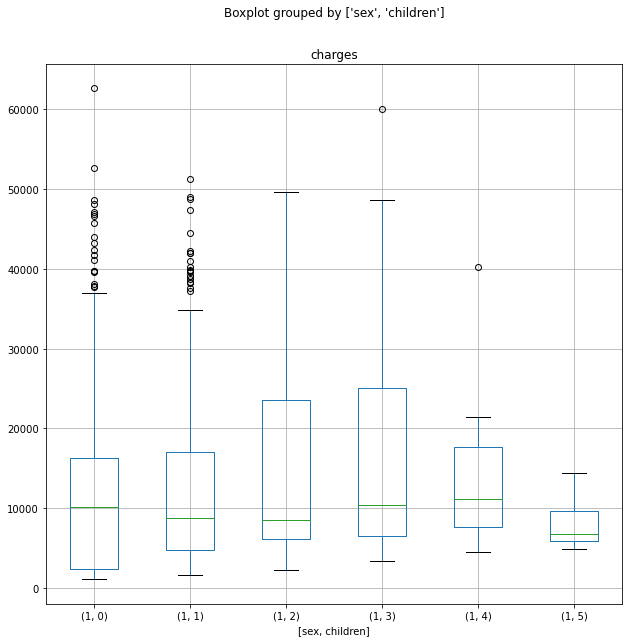

In [134]:
#Does the number of children a person have covered impact their charges considering their sex
i=0
sex0 = df[df['sex']==0]
sex1 = df[df['sex']==1]
  
sex0[['children','charges','sex']].boxplot(column=['charges'],by=['sex','children'],figsize=(10,10))
sex1[['children','charges','sex']].boxplot(column=['charges'],by=['sex','children'],figsize=(10,10))
#Add colour for different sexes

### These plots are an indication that children impact your charges depending on sex if you have more than 1 child. As can be seen above, sex 1 has higher charges when having 2 children or more.

<AxesSubplot:title={'center':'charges'}, xlabel='[sex]'>

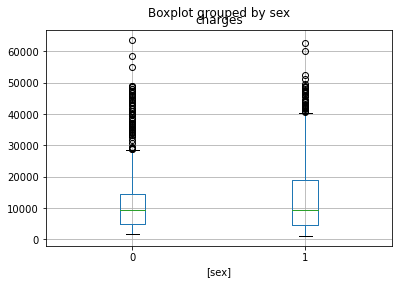

In [135]:
df[['sex','charges']].boxplot(by='sex')

<AxesSubplot:title={'center':'charges'}, xlabel='[region]'>

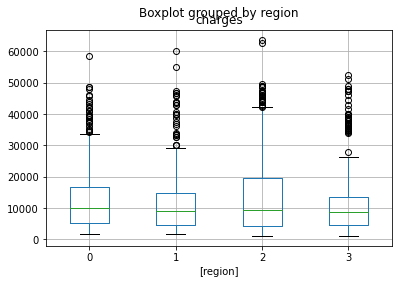

In [136]:
df[['region','charges']].boxplot(by='region')

In [137]:
X = df.drop('charges', axis='columns')
y = df['charges']

In [138]:
X = pd.get_dummies(X)
print(X.columns)
feature_names = X.columns
print(X)
X.head()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [139]:
X_train, X_test, y_train, y_test = train_test_split( X, y,stratify=X['smoker'], random_state=2)

In [140]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [141]:
def nullPredictor(X):
    average = []
    average.append((sum(df['charges']) / len(df['charges'])))
    return [average for X_val in X]

# Null model for regression is the avg of the target.
# As long as model is better than the null value it's good.

In [142]:
y_null_hat = nullPredictor(y_test)
print("Null RMSE: ",mean_squared_error(y_test, y_null_hat, squared=False))

Null RMSE:  11584.776450511354


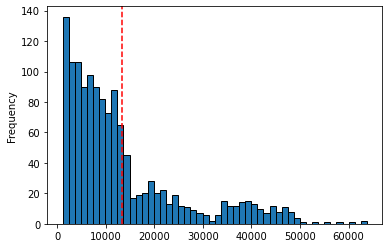

In [143]:
# A histogram showing the average charge/null predictor.
df.charges.plot.hist(bins=50,ec='black')
plt.axvline(df.charges.mean(),linestyle='--',c='red')

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)

# As seen in the slopes, sex and region do not have an effect on charges.
# -199.2047536, -453.30789577
print('slopes:', model.coef_)
print('R squared:', model.score(X,y))

yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

slopes: [  251.96294361  -199.2047536    341.80626768   520.45449159
 24157.60324768  -453.30789577]
R squared: 0.7504206308636931
RMSE 5819.723034630363


In [150]:
# Tests all posible cominations of each features, record their rmse values and take ones with the lowest rmse.
# This is to find the best possible subset
# Reference : https://stackoverflow.com/a/5898031
stuff = feature_names
testList = []

def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(0, len(ss)+1)))

for subset in all_subsets(stuff):
    testList.append(list(subset))


In [151]:
model = LinearRegression()
# Create a dictionary to store the subset number and the rmse value 
results = {'feature_set':[],'rmse':[]}

for i, feature in enumerate(testList):  
    
    if len(feature) ==0:
        continue
         
    X = df[feature]
    y = df['charges']   
    
    if 'smoker' in feature:
        stratify_var = X['smoker']
    else:
        stratify_var = None

    # Train data using the different subsets of features
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = stratify_var,random_state=2)

    model.fit(X_train, y_train)

    yhat = model.predict(X_test)
    
    # Add feature set number and rmse value to list
    results['feature_set'].append(i)
    results['rmse'].append(mean_squared_error(y_test, yhat, squared=False))

In [147]:
pd.DataFrame(results).sort_values(by = "rmse").head()

,feature_set,rmse
47,48,5800.382753
56,57,5801.160092
60,61,5817.981402
62,63,5819.723035
26,27,5819.912608


In [115]:
print(testList[48])

['age', 'bmi', 'children', 'smoker']


### As can be seen above, subset 48 is the best subset we can use. This can be seen already when showing the slopes. Sex and region do not have an effect and are therefore not in the subset

slopes: [  251.96294361,  -199.2047536,    341.80626768,   520.45449159,
 24157.60324768, -453.30789577]

In [154]:
print("Null RMSE: ",mean_squared_error(y_test, y_null_hat, squared=False))

Null RMSE:  11584.776450511354


In [156]:
model = LinearRegression()

X = df[testList[48]]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=X['smoker'], random_state=2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print('slopes:', model.coef_)
print('R squared:', model.score(X,y))
print('RMSE', mean_squared_error(y_test, yhat, squared=False))


slopes: [  254.14892008   327.25029253   494.37878052 24102.55705501]
R squared: 0.7495374581681424
RMSE 5800.382753063383


### As can be seen above, the rmse value is less than the null rmse, meaning the data is predictive.

<AxesSubplot:xlabel='target', ylabel='predictions'>

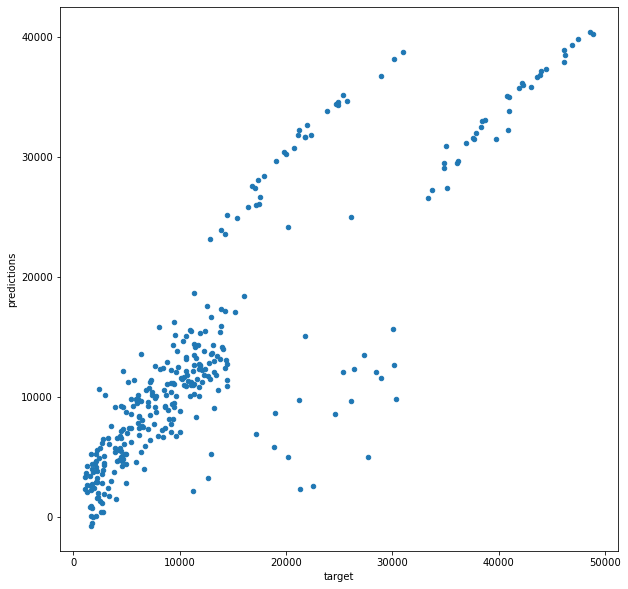

In [120]:
X_test['predictions']=yhat
X_test['target']=y_test
X_test[['target','predictions']].plot.scatter('target','predictions',figsize=(10,10))

### An R squared value of 0.75 indicates a high level of correlation 

## Does the model work? Why?
### yes, the rmse values are lower than the null rmse values therefore the model is predictive. The R squared values are also 0.75 indicating a high level or correlation




## What features are important? How do we know?
### We tested all the subsets of possible features by training a model and recording their rmse values. The model ['age', 'bmi', 'children', 'smoker'] had the lowest rmse meaning its contained features are the most important features




## Where does the model fall down?

### The model falls down in areas where there is a lower density of data. Notice in the histogram of charges,  there is a non trivial density of charges around 20,000 and 40,000. The amount around 20,000 and 40,000 is signifcantly lower than the amount around 10,000, however this density is significant enough that it has an observable effect on our model.



## Is the model perfect? Why/why not?
### No, a perfect model would have an R squared value of 1.0.  See above as to the reasoning for this.

## Future work - investigate the speration clearly seen in the chart above seen in the errors caused at a high target
### Potentially solved by transforming the target variable to something more normally distributed 
### See: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html